In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import VGG16

In [2]:
import os

base_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset'

train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir,'Test')
val_dir = os.path.join(base_dir,'Validation')

In [3]:
train_dir

'/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'

In [4]:
train_generator = ImageDataGenerator(1./255).flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='sparse',
    color_mode='rgb',
    batch_size=32
)

test_generator = ImageDataGenerator(1./255).flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='sparse',
    color_mode='rgb',
    batch_size=32
)

val_generator = ImageDataGenerator(1./255).flow_from_directory(
    val_dir,
    target_size=(224,224),
    class_mode='sparse',
    color_mode='rgb',
    batch_size=32
)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


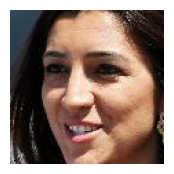

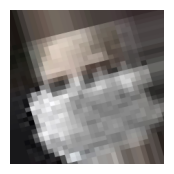

In [5]:
os.listdir(train_dir)
import matplotlib.image as mpimg

for i in os.listdir(train_dir):
    x = os.path.join(train_dir,i)
    f = os.listdir(x)[0]
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(mpimg.imread(os.path.join(x,f)))
    plt.show()

In [6]:
vgg = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

vgg.trainable=False

vgg.summary()

model = Sequential([
    Input(shape=(224,224,3)),
    vgg,
    Flatten(),
    Dense(2, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
history = model.fit(train_generator,epochs=5,batch_size=32,validation_data=val_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730718563.948166     116 service.cc:145] XLA service 0x7b201000bbb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730718563.948245     116 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - acc: 0.5938 - loss: 7.9306   

I0000 00:00:1730718572.936954     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 202ms/step - acc: 0.9762 - loss: 0.5362 - val_acc: 0.9925 - val_loss: 0.5230
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - acc: 0.9972 - loss: 0.0896 - val_acc: 0.9975 - val_loss: 0.3272
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - acc: 0.9989 - loss: 0.0453 - val_acc: 0.9962 - val_loss: 0.0447
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 80ms/step - acc: 0.9993 - loss: 0.0270 - val_acc: 1.0000 - val_loss: 1.2754e-05
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - acc: 0.9998 - loss: 0.0054 - val_acc: 0.9987 - val_loss: 0.0032


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step


In [10]:
y_true = []

for i in range(len(test_generator)):
    x,y = test_generator[i]
    y_true.append(y)

In [23]:
y_test = np.concatenate(y_true)

In [24]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [26]:
cr = classification_report(y_test,y_pred_labels)
print(cr)

              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48       483
         1.0       0.51      0.51      0.51       509

    accuracy                           0.50       992
   macro avg       0.50      0.50      0.50       992
weighted avg       0.50      0.50      0.50       992

